Homework 7

Chapter 6 Code: This focuses on trying to optimize the Travelling Salesman Problem. The TSP problem is where there is a salesman and he doesn't know how to organize his travel between n number or cities so that he can minimize travel costs.

In [18]:
import numpy as np
random_seed = 1729
np.random.seed(random_seed)
N = 40
x = np.random.rand(N)
y = np.random.rand(N)


# Set up points
points = zip(x,y)
cities = list(points)
itinerary = list(range(0,N))


# Lines displays the coordinates in the connection
lines = []

for j in range(0,len(itinerary) - 1):
  lines.append([cities[itinerary[j]],cities[itinerary[j + 1]]])

print(lines[0])



[(0.21215859519373315, 0.1421890509660515), (0.25901824052776146, 0.4415438502354807)]


The point of the previous code is to start mapping points in order to create an optimal path. The next set of code will create a visualization in terms of the lines that connect the points.

In [19]:
# This for generating the lines in the form of a graph
def genlines(cities,itinerary):
  lines = []
  for j in range(0,len(itinerary) - 1):
    lines.append([cities[itinerary[j]],cities[itinerary[j + 1]]])
  return(lines)

# Using pythagorean theorem to calculate the distance via the latitutde and longitude data
import math

def howfar(lines):
  distance = 0
  for j in range(0,len(lines)):
    
    distance += math.sqrt(abs(lines[j][1][0] - lines[j][0][0])**2 + \
    abs(lines[j][1][1] - lines[j][0][1])**2)
  return(distance)

totaldistance = howfar(genlines(cities,itinerary))
print(totaldistance)

16.808756356994223


Creating a first graph

In [22]:
import matplotlib.collections as mc
import matplotlib.pylab as pl
def plotitinerary(cities,itin,plottitle,thename):
  lc = mc.LineCollection(genlines(cities,itin), linewidths=2)
  fig, ax = pl.subplots()
  ax.add_collection(lc)
  ax.autoscale()
  ax.margins(0.1)
  pl.scatter(x, y)
  pl.title(plottitle)
  pl.xlabel('X Coordinate')
  pl.ylabel('Y Coordinate')
  pl.savefig(str(thename) + '.png')
  pl.close()


In [9]:
plotitinerary(cities,itinerary, 'TSP-random Itinerary', 'figure1')

We learn about a Brute-Force method that focuses on calculating the distance of each and every permutation (in this case 40!) to find the optimal solution. The purpose of the following algorithms is to find alternatives to the brute force.

In [10]:
# Nearest Neighbor- looking at the nearest neighbor to reduce the distance 
point = [0.5,0.5]
j = 10
distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)

In [11]:
# Find nearest algorithm look for the nearest 
def findnearest(cities,idx,nnitinerary):
  point = cities[idx]
  mindistance = float('inf')
  minidx = - 1
  for j in range(0,len(cities)):
    distance = math.sqrt((point[0] - cities[j][0])**2 + (point[1] - cities[j][1])**2)
    if distance < mindistance and distance > 0 and j not in nnitinerary:
      mindistance = distance
      minidx = j
    return(minidx)
  

# Create a new itinerary based on the find nearest function
nnitinerary = [cities[0]]

def donn(cities,N):
  nnitinerary = [0]
  for j in range(0,N - 1):
    next = findnearest(cities,nnitinerary[len(nnitinerary) - 1],nnitinerary)
    nnitinerary.append(next)
  return(nnitinerary)


# print(donn(cities,N))

# Plot the new itinerary
plotitinerary(cities,donn(cities,N),'TSP - Nearest Neighbor','figure3')

# Calculating the distance
print(howfar(genlines(cities,donn(cities,N))))

0.46593711461098514


Something is not right in the code that was provided. It has something to do with the donn function in the for loop.

In [15]:
# Testing different itineraries
initial_itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26, 27,28,29,30,31,32,33,34,35,36,37,38,39]

new_itinerary = [0,1,2,3,4,5,30,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27, 28,29,6,31,32,33,34,35,36,37,38,39]

print(howfar(genlines(cities,initial_itinerary)))
print(howfar(genlines(cities,new_itinerary)))

16.808756356994223
16.791583620116665


The next function follows the idea of swapping two places and finding anyway to reduce total distance.

In [18]:
def perturb(cities,itinerary):
  neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
  neighborids2 = math.floor(np.random.rand() * (len(itinerary)))

  itinerary2 = itinerary.copy()

  itinerary2[neighborids1] = itinerary[neighborids2]
  itinerary2[neighborids2] = itinerary[neighborids1]

  distance1 = howfar(genlines(cities,itinerary))
  distance2 = howfar(genlines(cities,itinerary2))

  itinerarytoreturn = itinerary.copy()

  if(distance1 > distance2):
    itinerarytoreturn = itinerary2.copy()

  return(itinerarytoreturn.copy())

itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29, 30,31,32,33,34,35,36,37,38,39]

np.random.seed(random_seed)
itinerary_ps = itinerary.copy()
for n in range(0,len(itinerary) * 50000):
  itinerary_ps = perturb(cities,itinerary_ps)

print(howfar(genlines(cities,itinerary_ps)))


This is better than Bruteforce since it only swaps two spots and looks to see if it reduces the overall distance

Both Nearest Neighbor and Perturb algorithms are greedy algorithms since they are looking at optimizing each step. However, it is a problem since it does not address the whole route. 

There is an analogy of a complex terrain. The idea is to find the highest point. The time is calculated by feeling the temperature. When it is warmer, it is easier to go down a little bit. As it gets colder, the climber needs to be approaching the top.

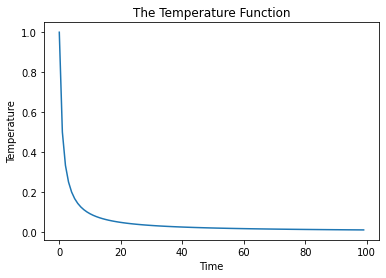

In [19]:
# Temperature Function
temperature = lambda t: 1/(t + 1)

import matplotlib.pyplot as plt
ts = list(range(0,100))
plt.plot(ts, [temperature(t) for t in ts])
plt.title('The Temperature Function')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

Simulated annealing is a modified form of perturb. This process combines the greedy algorithm and the terrain example. At first, we can adjust the itinerary to expand the total length. As time progresses, the algorithm starts to become greedy.

In [20]:
def perturb_sa1(cities,itinerary,time):
  neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
  neighborids2 = math.floor(np.random.rand() * (len(itinerary)))

  itinerary2 = itinerary.copy()

  itinerary2[neighborids1] = itinerary[neighborids2]  
  itinerary2[neighborids2] = itinerary[neighborids1]

  distance1 = howfar(genlines(cities,itinerary))
  distance2 = howfar(genlines(cities,itinerary2))

  itinerarytoreturn = itinerary.copy()

  randomdraw = np.random.rand()
  temperature = 1/((time/1000) + 1)

  if((distance2 > distance1 and (randomdraw) < (temperature)) or (distance1 > distance2)):
    itinerarytoreturn=itinerary2.copy()

  return(itinerarytoreturn.copy())

In [23]:
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29, 30,31,32,33,34,35,36,37,38,39]
np.random.seed(random_seed)

itinerary_sa = itinerary.copy()
for n in range(0,len(itinerary) * 50000):
  itinerary_sa = perturb_sa1(cities,itinerary_sa,n)

print(howfar(genlines(cities,itinerary))) #random itinerary
print(howfar(genlines(cities,itinerary_ps))) #perturb search
print(howfar(genlines(cities,itinerary_sa))) #simulated annealing
print(howfar(genlines(cities,donn(cities,N)))) #nearest neighbor

16.808756356994223
16.808756356994223
5.924388797206357
0.46593711461098514


By adding the temperature, we are able to add more speed to the algorithm.

In [24]:
# Turning algorithm
small = 10
big = 20
itinerary = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29, \
30,31,32,33,34,35,36,37,38,39]
itinerary[small:big] = itinerary[small:big][::-1]
print(itinerary)


# itinerary = [0,1,2,3,4,5,6,7,8,9] turns into itinerary = [0,5,6,7,8,1,2,3,4,9]

itinerary = [0,1,2,3,4,5,6,7,8,9]

itinerary = [0,5,6,7,8,1,2,3,4,9]

small = 1
big = 5
itinerary = [0,1,2,3,4,5,6,7,8,9]
tempitin = itinerary[small:big]
del(itinerary[small:big])
np.random.seed(random_seed + 1)
neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
for j in range(0,len(tempitin)):
  itinerary.insert(neighborids3 + j,tempitin[j])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


We can create a new perturb function that alternated between different methods.

In [ ]:
def perturb_sa2(cities,itinerary,time):
  neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
  neighborids2 = math.floor(np.random.rand() * (len(itinerary)))

  itinerary2 = itinerary.copy()

  randomdraw2 = np.random.rand()
  small = min(neighborids1,neighborids2)
  big = max(neighborids1,neighborids2)
  if(randomdraw2 >= 0.55):
    itinerary2[small:big] = itinerary2[small:big][:: - 1]
  elif(randomdraw2 < 0.45):
    tempitin = itinerary[small:big]
    del(itinerary2[small:big])
    neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
    for j in range(0,len(tempitin)):
        itinerary2.insert(neighborids3 + j,tempitin[j])
  else:
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]

  distance1 = howfar(genlines(cities,itinerary))
  distance2 = howfar(genlines(cities,itinerary2))

  itinerarytoreturn = itinerary.copy()

  randomdraw = np.random.rand()
  temperature = 1/((time/1000) + 1)

  if((distance2 > distance1 and (randomdraw) < (temperature)) or (distance1 > distance2)):
    itinerarytoreturn = itinerary2.copy()

  return(itinerarytoreturn.copy())



In [25]:
def perturb_sa3(cities,itinerary,time,maxitin):
  neighborids1 = math.floor(np.random.rand() * (len(itinerary)))
  neighborids2 = math.floor(np.random.rand() * (len(itinerary)))
  global mindistance
  global minitinerary
  global minidx
  itinerary2 = itinerary.copy()
  randomdraw = np.random.rand()

  randomdraw2 = np.random.rand()
  small = min(neighborids1,neighborids2)
  big = max(neighborids1,neighborids2)
  if(randomdraw2>=0.55):
    itinerary2[small:big] = itinerary2[small:big][::- 1 ]
  elif(randomdraw2 < 0.45):
    tempitin = itinerary[small:big]
    del(itinerary2[small:big])
    neighborids3 = math.floor(np.random.rand() * (len(itinerary)))
    for j in range(0,len(tempitin)):
      itinerary2.insert(neighborids3 + j,tempitin[j])
  else:
    itinerary2[neighborids1] = itinerary[neighborids2]
    itinerary2[neighborids2] = itinerary[neighborids1]

  temperature=1/(time/(maxitin/10)+1)
 
  distance1 = howfar(genlines(cities,itinerary))
  distance2 = howfar(genlines(cities,itinerary2))

  itinerarytoreturn = itinerary.copy()

  scale = 3.5
  if((distance2 > distance1 and (randomdraw) < (math.exp(scale*(distance1 - distance2)) * temperature)) or (distance1 > distance2)):
    itinerarytoreturn = itinerary2.copy()

  reset = True
  resetthresh = 0.04
  if(reset and (time - minidx) > (maxitin * resetthresh)):
    itinerarytoreturn = minitinerary
    minidx = time

  if(howfar(genlines(cities,itinerarytoreturn)) < mindistance):
    mindistance = howfar(genlines(cities,itinerary2))
    minitinerary = itinerarytoreturn
    minidx = time

  if(abs(time - maxitin) <= 1):
    itinerarytoreturn = minitinerary.copy()

  return(itinerarytoreturn.copy())

In [ ]:
def siman(itinerary,cities):
  newitinerary = itinerary.copy()
  global mindistance
  global minitinerary
  global minidx
  mindistance = howfar(genlines(cities,itinerary))
  minitinerary = itinerary
  minidx = 0

  maxitin = len(itinerary) * 50000
  for t in range(0,maxitin):
    newitinerary = perturb_sa3(cities,newitinerary,t,maxitin)

  return(newitinerary.copy())

# --

np.random.seed(random_seed)
itinerary = list(range(N))
nnitin = donn(cities,N)
nnresult = howfar(genlines(cities,nnitin))
simanitinerary = siman(itinerary,cities)
simanresult = howfar(genlines(cities,simanitinerary))
print(nnresult)
print(simanresult)
print(simanresult/nnresult)


Chapter 7 Notes: This chapter focuses on Geometry

Post master problem is to determine the optimal region of postoffices that a house can be a part of. 

The following starts with basic geometry around triangles.

In [28]:
point = [0.2,0.8]

triangle = [[0.2,0.8],[0.5,0.2],[0.8,0.7]]

def points_to_triangle(point1,point2,point3):
  triangle = [list(point1),list(point2),list(point3)]
  return(triangle)


def genlines(listpoints,itinerary):
  lines = []
  for j in range(len(itinerary)-1):
    lines.append([listpoints[itinerary[j]],listpoints[itinerary[j+1]]])
  return(lines)

import pylab as pl
from matplotlib import collections as mc
def plot_triangle_simple(triangle,thename):
  fig, ax = pl.subplots()

  xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
  ys = [triangle[0][1],triangle[1][1],triangle[2][1]]

  itin=[0,1,2,0]

  thelines = genlines(triangle,itin)

  lc = mc.LineCollection(genlines(triangle,itin), linewidths=2)

  ax.add_collection(lc)

  ax.margins(0.1)
  pl.scatter(xs, ys)
  pl.savefig(str(thename) + '.png')
  pl.close()

plot_triangle_simple(points_to_triangle((0.2,0.8),(0.5,0.2),(0.8,0.7)),'tri')

In [ ]:
def get_distance(point1,point2):
  distance = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
  return(distance)

Common Geometric Terms
Bisect: To divide a line into two equal segments. Bisecting finds a line at the midpoint
Equilateral: All sides are equal
Perpendicular: Two lines that form a 90 degree angle
Vertex: The point at which two edges of a shape meet

Circumcenter

There are three lines that connect from a vertex to the midpoint of the opposite side. The centroid is where all three line segments intersect.

The centroid is the center of a unique circle that intersects with the three vertices of a triangle.
However, this poses a problem that there can be infinitely many centers.

In [31]:
def triangle_to_circumcenter(triangle):
  x,y,z = complex(triangle[0][0],triangle[0][1]), complex(triangle[1][0],triangle[1][1]), \
  complex(triangle[2][0],triangle[2][1])
  w = z - x
  w /= y - x
  c = (x-y) * (w-abs(w)**2)/2j/w.imag - x
  radius = abs(c + x)
  return((0 - c.real,0 - c.imag),radius)


def plot_triangle(triangles,centers,radii,thename):
  fig, ax = pl.subplots()
  ax.set_xlim([0,1])
  ax.set_ylim([0,1])
  for i in range(0,len(triangles)):
    triangle = triangles[i]
    center = centers[i]
    radius = radii[i]
    itin = [0,1,2,0]
    thelines = genlines(triangle,itin)
    xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
    ys = [triangle[0][1],triangle[1][1],triangle[2][1]]

    lc = mc.LineCollection(genlines(triangle,itin), linewidths = 2)

    ax.add_collection(lc)
    ax.margins(0.1)
    pl.scatter(xs, ys)
    pl.scatter(center[0],center[1])

    circle = pl.Circle(center, radius, color = 'b', fill = False)

    ax.add_artist(circle)
  pl.savefig(str(thename) + '.png')
  pl.close()

triangle1 = points_to_triangle((0.1,0.1),(0.3,0.6),(0.5,0.2))
center1,radius1 = triangle_to_circumcenter(triangle1)
triangle2 = points_to_triangle((0.8,0.1),(0.7,0.5),(0.8,0.9))
center2,radius2 = triangle_to_circumcenter(triangle2)
plot_triangle([triangle1,triangle2],[center1,center2],[radius1,radius2],'two')

Triangulation:
Turning a set of points into a set of triangles

Fastest way to triangulate irregular patterns is by algorithms...

Bowyer-Watson algorithm focuses on taking a set of points as its input and output a Delaunay triangulation which tends to output triangles that are close to equilateral.

In the book, they add another point into a triangulated shape. When adding a point to the DT, no point can be within a circumcircle of any of the triangles.

In [ ]:
delaunay = [points_to_triangle((0.2,0.8),(0.5,0.2),(0.8,0.7))]

point_to_add = [0.5,0.5]

import math
invalid_triangles = []
delaunay_index = 0
while delaunay_index < len(delaunay):
  circumcenter,radius = triangle_to_circumcenter(delaunay[delaunay_index])
  new_distance = get_distance(circumcenter,point_to_add)
  if(new_distance < radius):
    invalid_triangles.append(delaunay[delaunay_index])
  delaunay_index += 1

points_in_invalid = []

for i in range(len(invalid_triangles)):
  delaunay.remove(invalid_triangles[i])
  for j in range(0,len(invalid_triangles[i])):
    points_in_invalid.append(invalid_triangles[i][j])

points_in_invalid = [list(x) for x in set(tuple(x) for x in points_in_invalid)]



In [ ]:
for i in range(len(points_in_invalid)):
  for j in range(i + 1,len(points_in_invalid)):
    #count the number of times both of these are in the bad triangles
    count_occurrences = 0
    for k in range(len(invalid_triangles)):
      count_occurrences += 1 * (points_in_invalid[i] in invalid_triangles[k]) * (points_in_invalid[j] in invalid_triangles[k])
    if(count_occurrences == 1):
      delaunay.append(points_to_triangle(points_in_invalid[i], points_in_invalid[j], point_to_add))


In [ ]:
def gen_delaunay(points):
  delaunay = [points_to_triangle([-5,-5],[-5,10],[10,-5])]
  number_of_points = 0

  while number_of_points < len(points): # 1
    point_to_add = points[number_of_points]

    delaunay_index = 0

    invalid_triangles = [] # 2
    while delaunay_index < len(delaunay):
      circumcenter,radius = triangle_to_circumcenter(delaunay[delaunay_index])
      new_distance = get_distance(circumcenter,point_to_add)
      if(new_distance < radius):
        invalid_triangles.append(delaunay[delaunay_index])
      delaunay_index += 1

    points_in_invalid = [] # 3
    for i in range(0,len(invalid_triangles)):
      delaunay.remove(invalid_triangles[i])
      for j in range(0,len(invalid_triangles[i])):
        points_in_invalid.append(invalid_triangles[i][j])
      points_in_invalid = [list(x) for x in set(tuple(x) for x in points_in_invalid)]

    for i in range(0,len(points_in_invalid)): # 4
      for j in range(i + 1,len(points_in_invalid)):
        #count the number of times both of these are in the bad triangles
        count_occurrences = 0
        for k in range(0,len(invalid_triangles)):
          count_occurrences += 1 * (points_in_invalid[i] in invalid_triangles[k]) * (points_in_invalid[j] in invalid_triangles[k])
        if(count_occurrences == 1):
          delaunay.append(points_to_triangle(points_in_invalid[i], points_in_invalid[j], point_to_add))

    number_of_points += 1

  return(delaunay)

In [ ]:

N=15
import numpy as np
np.random.seed(5201314)
xs = np.random.rand(N)
ys = np.random.rand(N)
points = zip(xs,ys)
listpoints = list(points)
the_delaunay = gen_delaunay(listpoints)

Voronoi Diagram is where we find the DT of a set of points and take the circumcenter of every triangles and draw lines connecting circumcenters that are part of triangles in the DT that share an edge.

In [ ]:


def plot_triangle_circum(triangles,centers,plotcircles,plotpoints, plottriangles,plotvoronoi,plotvpoints,thename):
  fig, ax = pl.subplots()
  ax.set_xlim([-0.1,1.1])
  ax.set_ylim([-0.1,1.1])

  lines=[]
  for i in range(0,len(triangles)):
    triangle = triangles[i]
    center = centers[i][0]
    radius = centers[i][1]
    itin = [0,1,2,0]
    thelines = genlines(triangle,itin)
    xs = [triangle[0][0],triangle[1][0],triangle[2][0]]
    ys = [triangle[0][1],triangle[1][1],triangle[2][1]]

    lc = mc.LineCollection(genlines(triangle,itin), linewidths=2)
    if(plottriangles):
      ax.add_collection(lc)
    if(plotpoints):
      pl.scatter(xs, ys)

    ax.margins(0.1)
    if(plotvpoints):
      pl.scatter(center[0],center[1])

    circle = pl.Circle(center, radius, color = 'b', fill = False)
    if(plotcircles):
      ax.add_artist(circle)

    if(plotvoronoi):
      for j in range(0,len(triangles)):
        commonpoints = 0
        for k in range(0,len(triangles[i])):
          for n in range(0,len(triangles[j])):
            if triangles[i][k] == triangles[j][n]:
              commonpoints += 1
        if commonpoints == 2:
          lines.append([list(centers[i][0]),list(centers[j][0])])

    lc = mc.LineCollection(lines, linewidths = 1)

    ax.add_collection(lc)

  pl.savefig(str(thename) + '.png')
  pl.close()

In [ ]:
circumcenters = []
for i in range(0,len(the_delaunay)):
  circumcenters.append(triangle_to_circumcenter(the_delaunay[i]))

plot_triangle_circum(the_delaunay,circumcenters,False,True,False,True,False,'final')


plot_triangle_circum(the_delaunay,circumcenters,True,True,True,True,True,'everything')